## 1. REGRESSION MODEL

In [147]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [148]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [149]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['Price']=housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
#Create data
x = housing_df.drop('Price', axis=1)
y = housing_df['Price']

#Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Create model instance
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

## 2. CLASSIFICATION MODEL

In [151]:
heart_disease = pd.read_csv('1_ML_Datas/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [152]:
from sklearn import ensemble

In [153]:
X = heart_disease.drop('target', axis=1)
Y = heart_disease['target']

In [154]:
np.random.seed(42)
clf = ensemble.RandomForestClassifier()
X_trains, X_tests, y_trains, y_tests = train_test_split(X, Y, test_size=0.2)
clf.fit(X_trains, y_trains)

RandomForestClassifier()

## 3. Evaluating a model using inbuilt `score()` method

In [155]:
#Regression model
model.score(X_test, y_test)

0.8066196804802649

In [156]:
#Classification model
clf.score(X_tests, y_tests)

0.8524590163934426

In [157]:
y_pred = model.predict(X_test)
np.array(y_pred)[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [158]:
np.array(y_test)[:10]

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [159]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.3265721842781009

## Evaluating a model using `scoring` parameter

In [160]:
#For classification model
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cross_val_score = cross_val_score(clf, X, Y, cv=5, scoring=None)

In [161]:
np.mean(cross_val_score)
f'{cross_val_score*100}%', f'{clf.score(X_tests, y_tests)*100}%'

('[81.96721311 90.16393443 83.60655738 78.33333333 78.33333333]%',
 '85.24590163934425%')

In [162]:
#Calculating mean from cross-validation-score
np.mean(cross_val_score)

0.8248087431693989

## Classification model evaluation metrics
* Accuracy
* Area under ROC curve
* Classification report
* Confusion matrix

**Accuracy**

In [163]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(clf, X, Y, cv=5)

In [164]:
cross_val_score

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [165]:
print(f'Heart Disease Classifier Cross-Validation Accuracy: {np.mean(cross_val_score)*100:.2f}%')

Heart Disease Classifier Cross-Validation Accuracy: 80.18%


**Area under the Receiver Operating Characteristic curve (AUC/ROC)** 
1. ROC curves are a comparison of a model's true positive rate (tpr)versus a models false positive rate (fpr)
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative model predicts 0 when truth is 1

In [166]:
from sklearn.metrics import roc_curve
from sklearn import ensemble
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = ensemble.RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [167]:
cross_val_score

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [168]:
y_pred = clf.predict_proba(X_test)
y_pred[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [169]:
y_prob_pos = y_pred[:, 1]

In [170]:
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos)

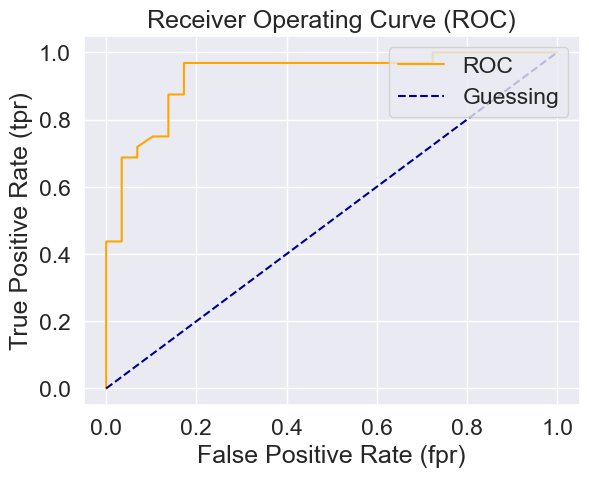

In [171]:
#Create a function for plotting ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1], [0,1], color='darkblue', ls='--', label='Guessing')
    plt.legend(loc='upper right')
    plt.title('Receiver Operating Curve (ROC)')
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.show()
plot_roc_curve(fpr, tpr)

**Getting AUC (area under curve) score**

In [172]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_prob_pos)

0.9304956896551724

**Plotting Perfect Ideal Curve Just to know**

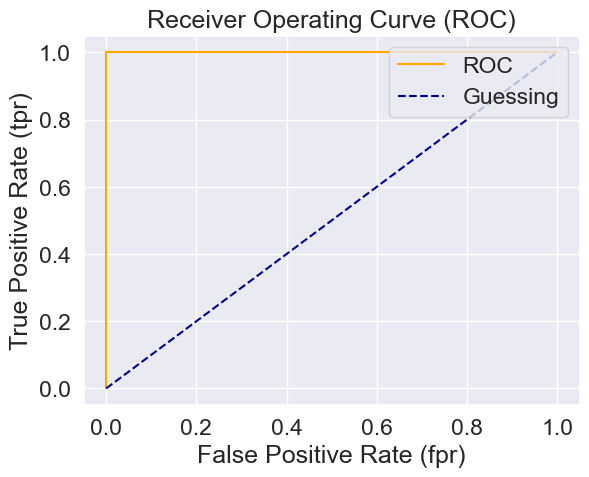

In [173]:
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [174]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**
* Quick way to compare the labels a model predicts and the actual label it was supposed to predict
* Giving idea of where the model is getting confused

In [175]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_tests)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [176]:
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Labels'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


Text(41.25, 0.5, 'Actual Labels')

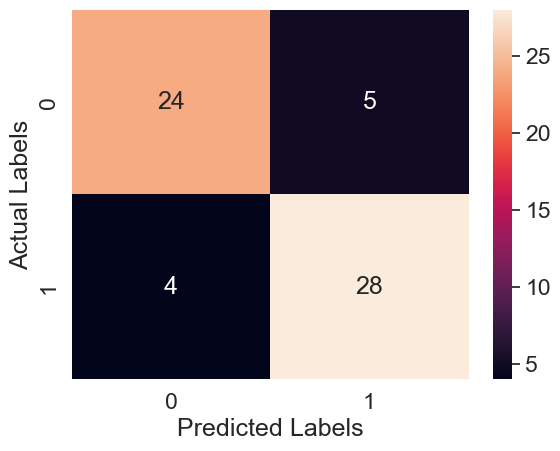

In [177]:
import seaborn as sns

sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

## How to install library with in Jupyter Notebook

In [178]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: osx-64
Solving environment: done

# All requested packages already installed.



## Confusion matrix display using sklearn library

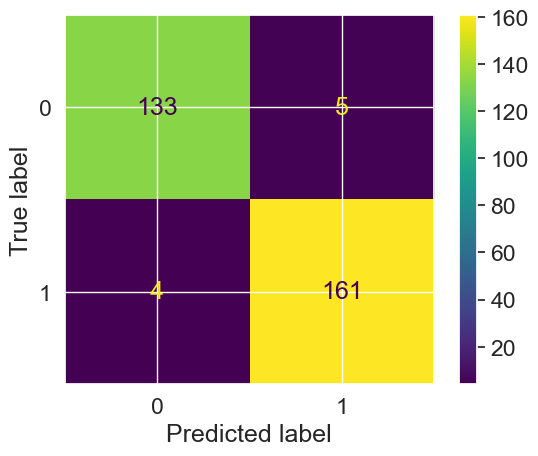

In [179]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=Y)

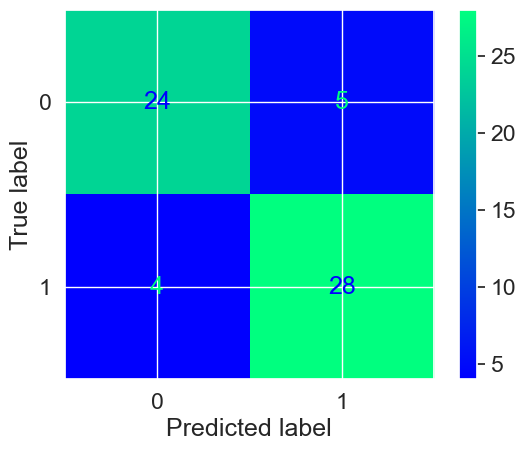

In [180]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds,
                                       cmap='winter')

In [182]:
from sklearn.metrics import classification_report

In [185]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

